In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-1/train.csv
/kaggle/input/covid19-global-forecasting-week-1/submission.csv
/kaggle/input/covid19-global-forecasting-week-1/test.csv


In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [3]:
df2 = pd.read_csv('../input/covid19-global-forecasting-week-1/train.csv', sep = ',')

In [4]:
## I will use train set only
df2.tail()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0
17891,26382,NaN,Zambia,-15.4167,28.2833,2020-03-24,3.0,0.0


In [5]:
confirmed = df2.groupby('Date').sum()['ConfirmedCases'].reset_index()
death = df2.groupby('Date').sum()['Fatalities'].reset_index()

In [6]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [7]:
m = Prophet(interval_width=0.97)
m.fit(confirmed)
future = m.make_future_dataframe(periods=29)
future_confirmed = future.copy() 
future.tail()

,ds
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2020-04-18,702554.408744,624871.608216,799068.163076
88,2020-04-19,718923.578079,633152.552835,812705.312785
89,2020-04-20,736527.904344,647382.484300,833637.360933
90,2020-04-21,750728.479993,662152.844418,857697.993646
91,2020-04-22,758095.921565,653848.902279,870624.180956


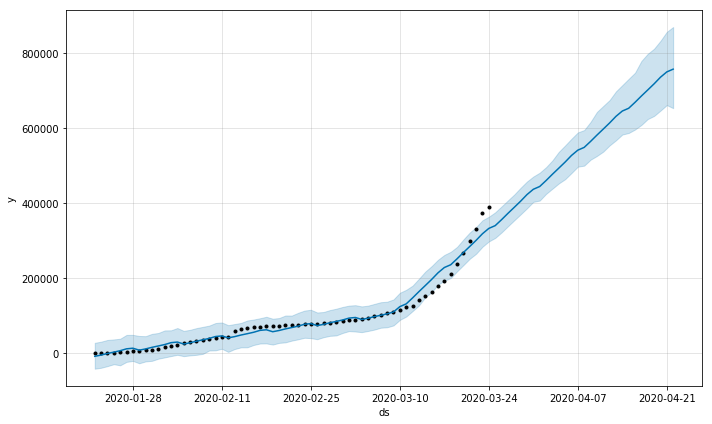

In [9]:
confirmed_cases = m.plot(forecast)

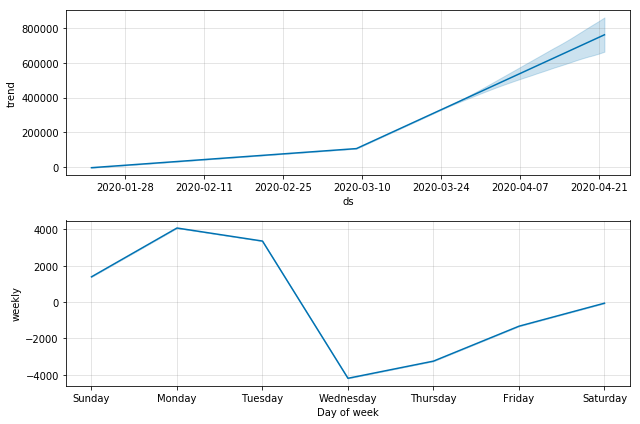

In [10]:
forecast_components = m.plot_components(forecast)

In [11]:
forecast1=pd.DataFrame(forecast)


In [12]:
## These are the predictions for Confirmed Covid-19 cases until 2020 April 22
forecastC= forecast1[['ds', 'yhat']]
forecastC.columns = [['ForecastId', 'ConfirmedCases']]


In [13]:
death.columns = ['ds','y']
death['ds'] = pd.to_datetime(death['ds'])

In [14]:
m = Prophet(interval_width=0.97)
m.fit(death)
future = m.make_future_dataframe(periods=29)
future_deaths = future.copy() 
future.tail()

,ds
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22


In [15]:
forecastD = m.predict(future)
forecastD[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2020-04-18,28901.418549,24924.375131,32370.071668
88,2020-04-19,29576.330128,25538.571086,33262.866468
89,2020-04-20,30292.237747,26373.273660,34340.478041
90,2020-04-21,30933.655146,26671.022898,34948.284527
91,2020-04-22,31144.413347,26776.453616,35272.244250


In [16]:
death_predict = pd.DataFrame(forecastD)

In [17]:
## These are the predictions for Deaths by Covid-19 cases until 2020 April 24

forecastDeath= death_predict[['ds', 'yhat']]
forecastDeath.columns = [['ForecastId', 'Fatalities']]


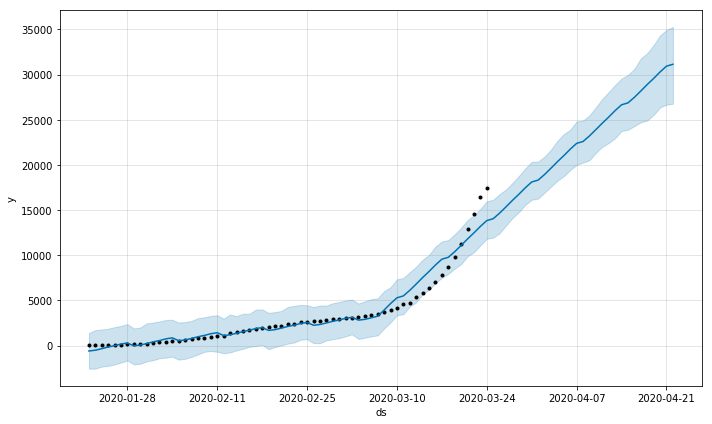

In [18]:
death_forecast = m.plot(forecastD)

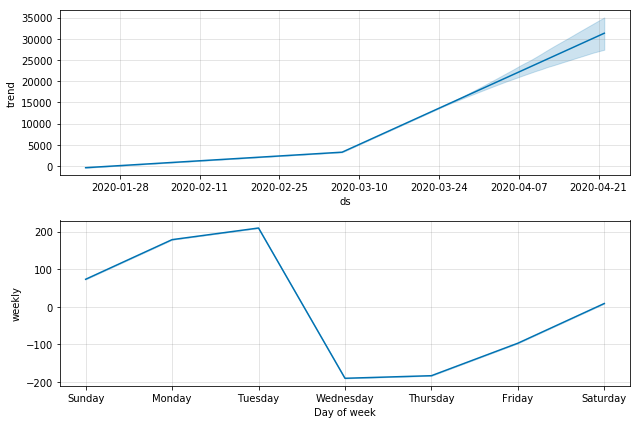

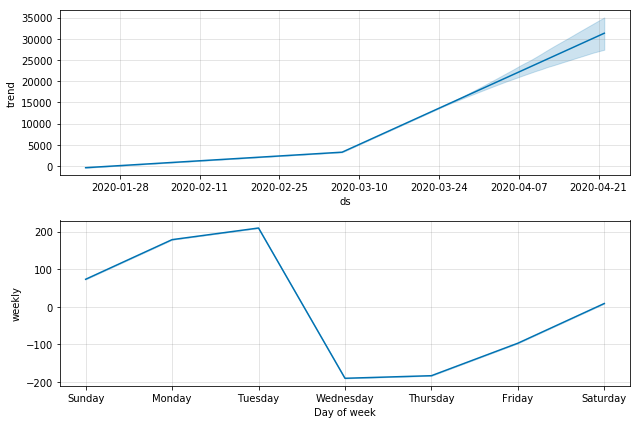

In [19]:
forecastD_components = m.plot_components(forecastD)
forecastD_components

In [20]:
submission = pd.merge(forecastC, forecastDeath, how='inner')

In [21]:
submission.to_csv('submission.csv', index=False)
